In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.dtypes

survived          int64
pclass          float64
sex              object
age             float64
sibsp           float64
parch           float64
fare            float64
embarked         object
class          category
who              object
adult_male       object
deck           category
embark_town      object
alive            object
alone            object
dtype: object

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,603.000000,602.000000,475.000000,602.000000,602.000000,602.000000
mean,0.393035,2.308970,29.770526,0.539867,0.375415,31.798200
std,0.488830,0.834501,14.522232,1.097223,0.773044,46.219945
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [6]:
titanic.isna().sum()

survived         0
pclass           1
sex              1
age            128
sibsp            1
parch            1
fare             1
embarked         2
class            1
who              1
adult_male       1
deck           467
embark_town      2
alive            1
alone            1
dtype: int64

In [7]:
titanic['age'].fillna(titanic['age'].mean(),inplace=True)
titanic['deck'].fillna('C',inplace=True)
titanic.dropna(inplace=True)


C:\Users\piyus\AppData\Local\Temp\ipykernel_23824\2060461689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(),inplace=True)
C:\Users\piyus\AppData\Local\Temp\ipykernel_23824\2060461689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [8]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
num = []
cat = []
for col in titanic.columns:
    if(titanic[col].nunique()>10):
        num.append(col)
    else:
        cat.append(col)

In [10]:
cat

['survived',
 'pclass',
 'sex',
 'sibsp',
 'parch',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

Univariate analysis

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True


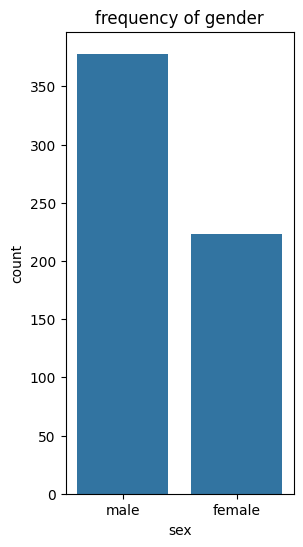

<Axes: xlabel='pclass', ylabel='count'>

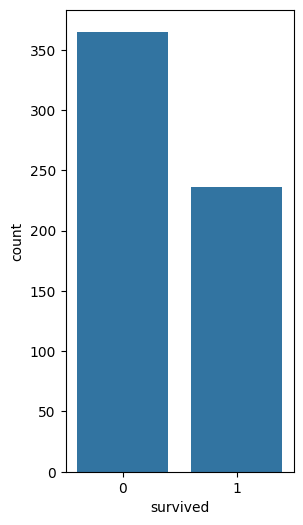

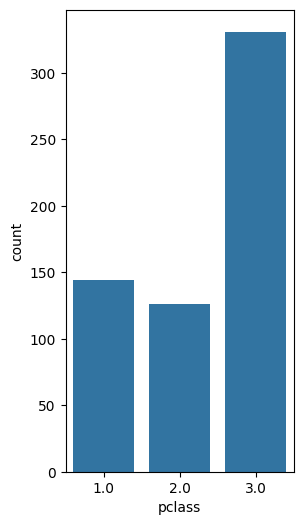

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.countplot(x='sex', data=titanic)
plt.title('frequency of gender')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(1,3,2)
sns.countplot(data=titanic, x = 'survived')

plt.figure(figsize=(10,6))
plt.subplot(1,3,3)
sns.countplot(x = 'pclass', data = titanic)

<Axes: xlabel='embark_town', ylabel='count'>

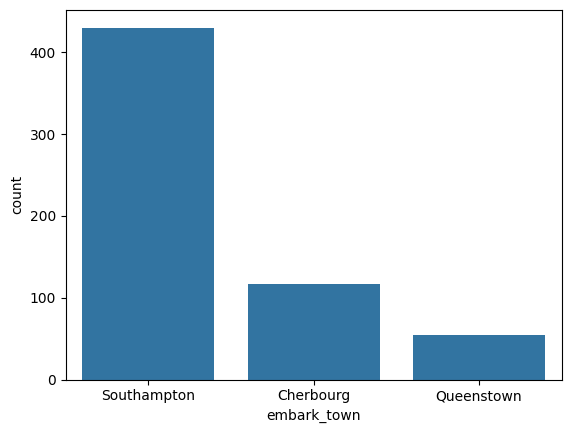

In [13]:
sns.countplot(data=titanic, x = 'embark_town')

([<matplotlib.patches.Wedge at 0x1804fede270>,
 [Text(-0.6890451453262583, 0.8574478338081658, 'S'),
  Text(0.4229433063953967, -1.0154402786847339, 'C'),
  Text(1.0564672437222085, -0.3063934773163419, 'Q')],
 [Text(-0.37584280654159535, 0.4676988184408177, '71.5%'),
  Text(0.2306963489429436, -0.5538765156462183, '19.5%'),
  Text(0.5762548602121137, -0.16712371489982283, '9.0%')])

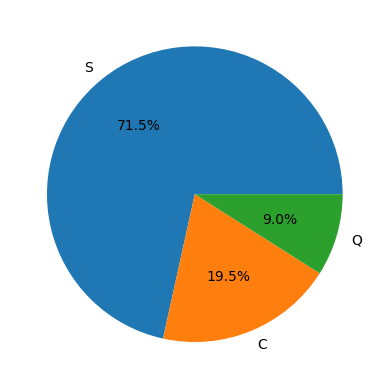

In [14]:
count = titanic['embarked'].value_counts()
lable = count.index
plt.pie(titanic['embarked'].value_counts(),autopct='%1.1f%%',labels=lable)

([<matplotlib.patches.Wedge at 0x1804ddef0e0>,
 [Text(-0.806729496808759, 0.7477884185909051, '0.0'),
  Text(0.5011816733346331, -0.9791919782726456, '1.0'),
  Text(1.0165422690220864, -0.42028777675710277, '2.0'),
  Text(1.0978366183284678, -0.06895476384640979, '4.0'),
  Text(1.0994590327955265, -0.03449398794464865, '5.0'),
  Text(1.0999398876656157, -0.01149971835102186, '3.0')],
 [Text(-0.4400342709865958, 0.4078845919586755, '76.2%'),
  Text(0.2733718218188908, -0.534104715421443, '12.6%'),
  Text(0.5544776012847743, -0.22924787823114695, '9.8%'),
  Text(0.5988199736337096, -0.03761168937076897, '0.7%'),
  Text(0.599704926979378, -0.018814902515262896, '0.3%'),
  Text(0.5999672114539721, -0.006272573646011924, '0.3%')])

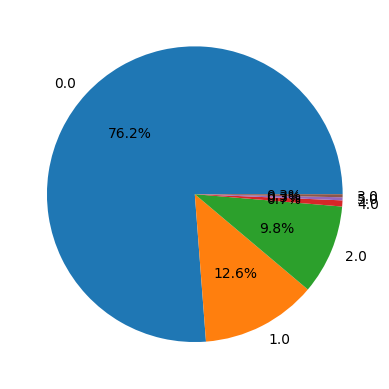

In [15]:
count_parch = titanic['parch'].value_counts()
label = count_parch.index
plt.pie(count_parch,autopct='%1.1f%%',labels=label )

In [16]:
num

['age', 'fare']

<Axes: xlabel='age', ylabel='Count'>

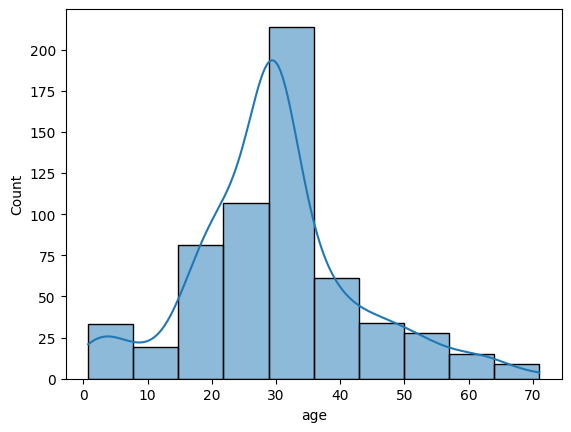

In [17]:
sns.histplot(titanic['age'],bins=10, kde=True)

<Axes: xlabel='fare', ylabel='Count'>

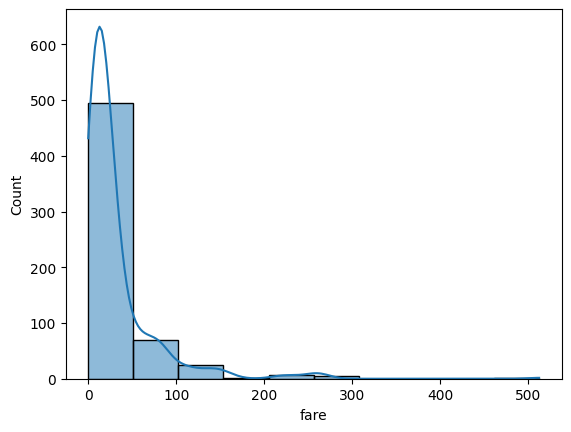

In [18]:
sns.histplot(titanic['fare'],bins=10, kde=True)

<Axes: ylabel='fare'>

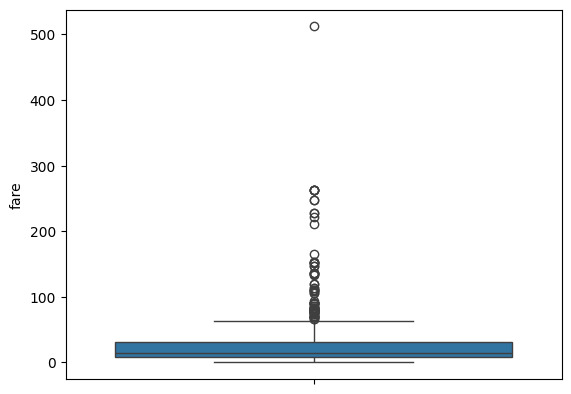

In [19]:
sns.boxplot(titanic['fare'])

In [54]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.392679,2.311148,29.756833,0.540765,0.376040,31.717997
std,0.488753,0.833482,12.903262,1.097916,0.773536,46.216501
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.770526,0.000000,0.000000,14.500000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


<Axes: >

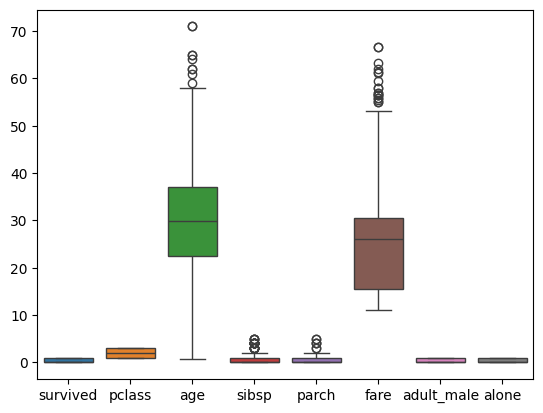

In [64]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)


IQR = Q3 - Q1
LowerBound = IQR - 1.5*Q1
UpperBound = IQR + 1.5*Q3

newData = titanic[(titanic['fare']>=LowerBound) & (titanic['fare']<=UpperBound)]

# for column in num:
#     newData = titanic[(titanic[column]>=LowerBound) & (titanic[column]<=UpperBound)]

sns.boxplot(data = newData)

<Axes: ylabel='fare'>

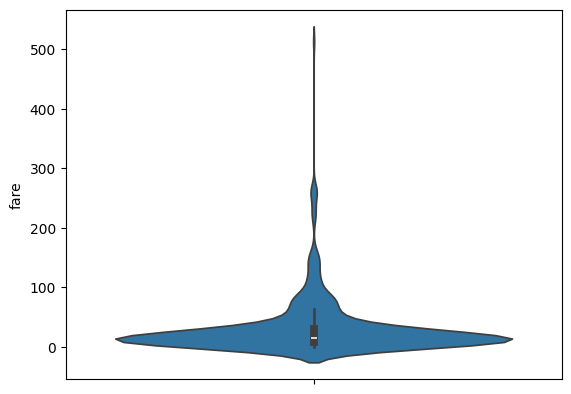

In [20]:
sns.violinplot(titanic['fare'])

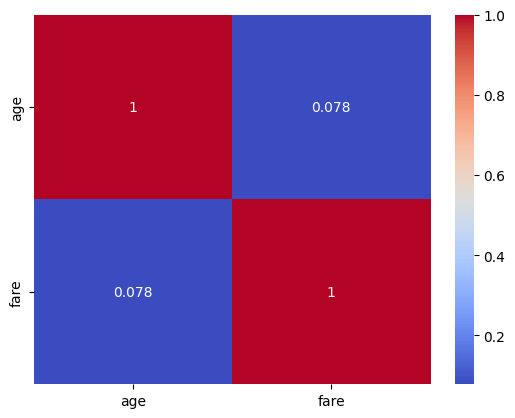

In [25]:
correlation = titanic[num].corr()
sns.heatmap(correlation , annot=True, cmap = 'coolwarm')
plt.show()

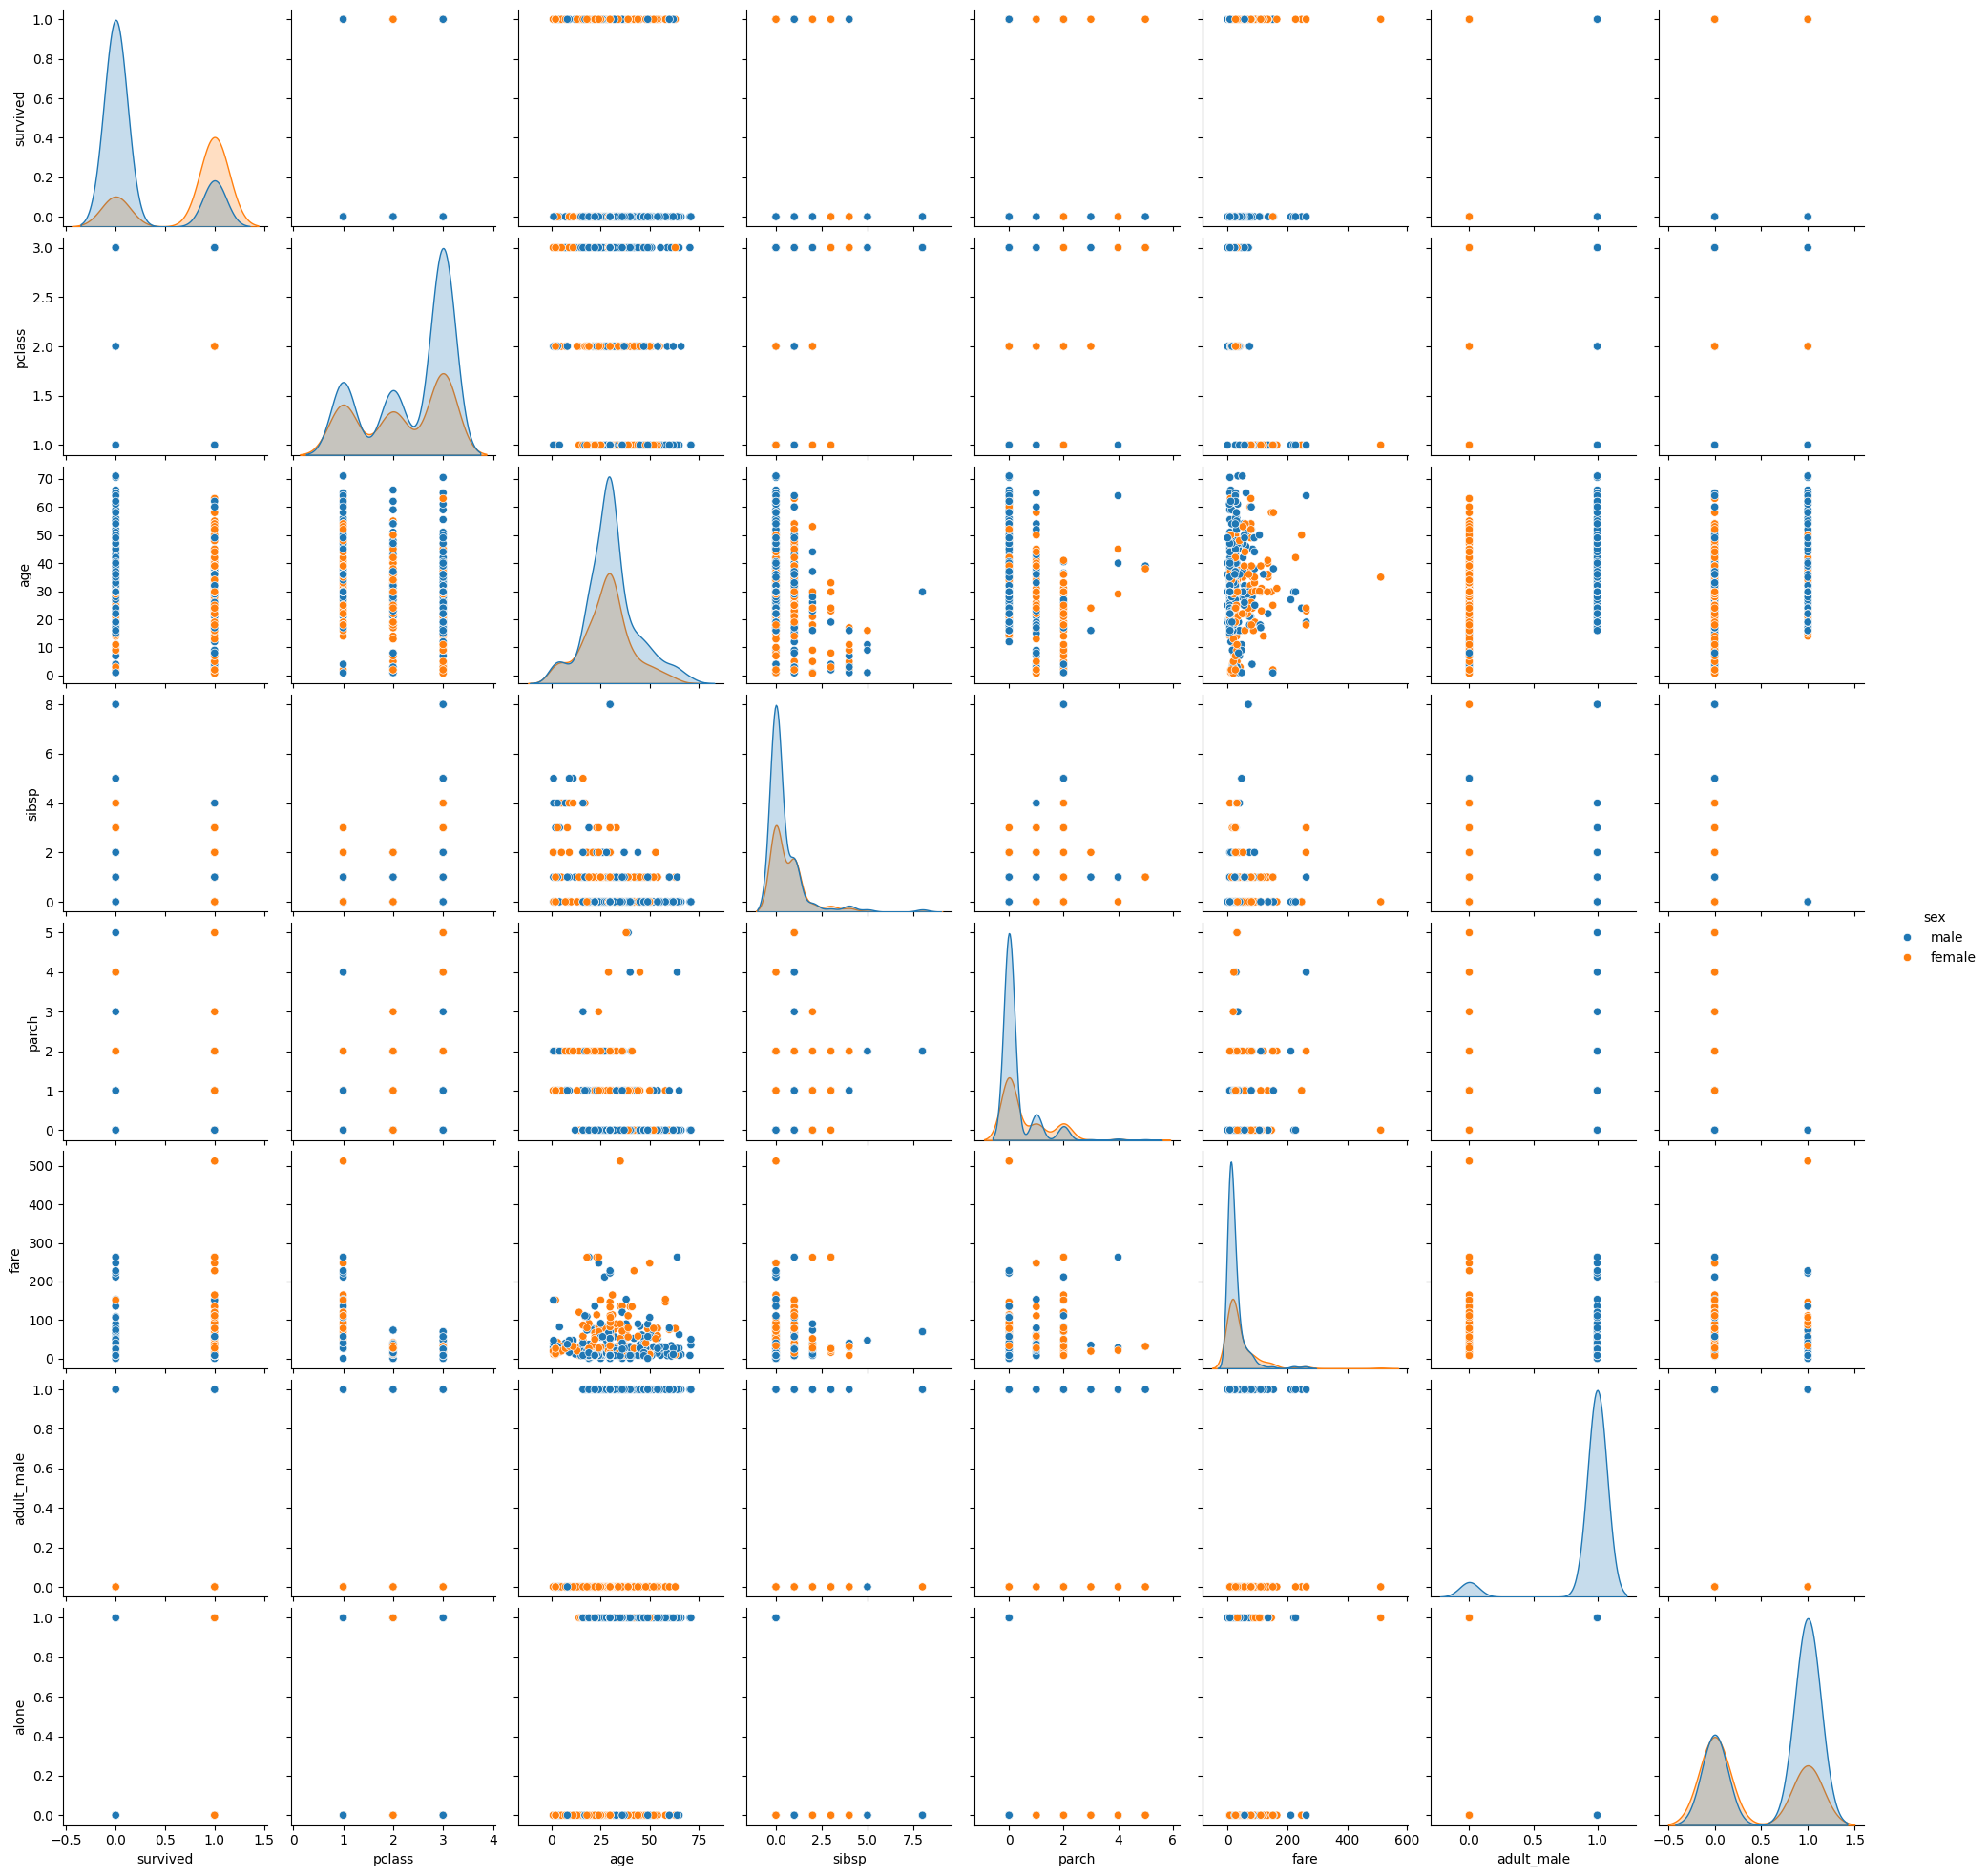

In [ ]:
sns.pairplot(titanic,hue='sex')


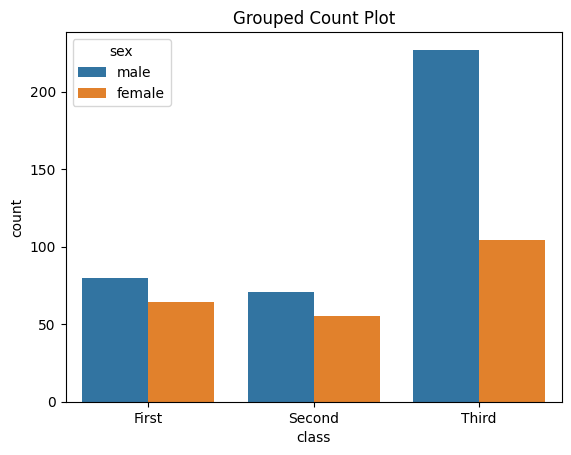

In [51]:
sns.countplot(x='class', hue='sex', data=titanic)
plt.title('Grouped Count Plot')
plt.show()


<Axes: xlabel='age', ylabel='fare'>

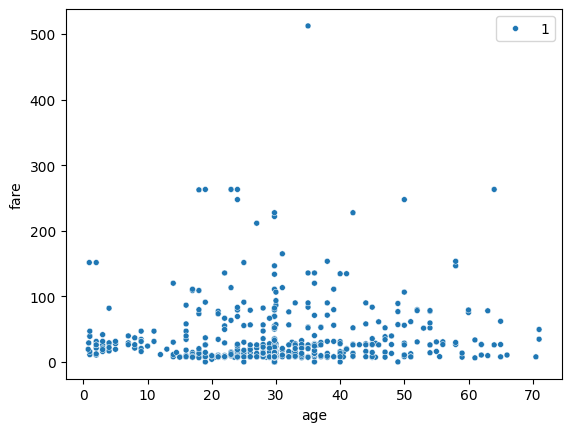

In [37]:
sns.scatterplot(x=titanic['age'],y=titanic['fare'],size=1)